# I. Bayes Estimator and Bayes Risk

We simulate an experiment to determine the likelihood of a person being a professional football player, an amateur, or neither, based on the position they usually play. 

## Question 1 (M)

#### A. Setup

##### Input Space \(X\)
The input space \(X = \{0, 1, 2, 3\}\) represents the positions played on a football field:
- \(0\) - Goalkeeper
- \(1\) - Defender
- \(2\) - Midfielder
- \(3\) - Attacker

##### Output Space \(Y\)
The output space \(Y = \{0, 1, 2\}\) categorizes the football playing status of a person:
- \(0\) - Regular person
- \(1\) - Amateur
- \(2\) - Professional

##### Probability Model for \(X\)
\(X\) follows a multinomial distribution with a single trial and probabilities \([0.1, 0.2, 0.3, 0.4]\) for each of the positions respectively. This suggests that in our sample, attackers are most frequent, followed by midfielders, defenders, and goalkeepers.

#### B. Conditional Distributions \(Y | X\)
- $Y = Mult(1, [0.7, 0.2, 0.1])$ if $X = 0$
- $Y = Mult(1, [0.8, 0.15, 0.05])$ if $X = 1$
- $Y = Mult(1, [0.9, 0.08, 0.02])$ if $X >= 2$


#### C. Bayes Estimator


- $P(Y=0) = \sum_{i=0}^3 P(Y=0|X=x_i)*P(X=x_i) = 0.86$
- $P(Y=1) = \sum_{i=0}^3 P(Y=1|X=x_i)*P(X=x_i) = 0.106$
- $P(Y=2) = \sum_{i=0}^3 P(Y=2|X=x_i)*P(X=x_i) = 0.0304$

$f^*(x) = 0$

#### D. Bayes Risk

$R(f^*) = E[I(Y, f^*(x))] = \sum_{i=0}^3 P(Y \neq 0 | X=x_i)*P(X=x_i) = 0.14$

## Question 2 (C)

- Bayes estimator : $f^*(x) = 0$
- Estimator f1 : $f_1(x) = 2$ if $X=0$ and $0$ otherwise

In [23]:
import numpy as np

def bayes() -> None:

    n_samples = int(1e6)

    X = np.random.multinomial(1, [0.1, 0.2, 0.3, 0.4], size=n_samples)

    # Copy X for parameters
    multinomial_parameters = np.zeros((n_samples, 3))  # Assuming there are 3 categories
    # Set parameters for each category using boolean indexing
    multinomial_parameters[X[:, 0] == 1] = [0.7, 0.2, 0.1]
    multinomial_parameters[X[:, 1] == 1] = [0.8, 0.15, 0.05]
    multinomial_parameters[(X[:, 2] == 1) | (X[:, 3] == 1)] = [0.9, 0.08, 0.02]

    # Generate new multinomial distribution based on updated parameters
    y = np.array([np.random.multinomial(1, p) for p in multinomial_parameters])

    y_pred_bayes = np.zeros((n_samples, 3))
    y_pred_bayes[:, 0] = 1

    # print(f"Bayes estimator: {y_pred_bayes}")
    y_pred_f1 = np.zeros((n_samples, 3))
    y_pred_f1[X[:, 0] == 1] = [0, 0, 1]
    y_pred_f1[(X[:, 1] == 1) | (X[:, 2] == 1) | (X[:, 3] == 1)] = [1, 0, 0]

    emperical_risk_bayes = np.mean(np.any(y != y_pred_bayes, axis=1))
    emperical_risk_f1 = np.mean(np.any(y != y_pred_f1, axis=1))

    print(f"Empirical risk for Bayes estimator: {emperical_risk_bayes}")
    print(f"Empirical risk for f1 estimator: {emperical_risk_f1}")

bayes()

Empirical risk for Bayes estimator: 0.140026
Empirical risk for f1 estimator: 0.199661


# II. Bayes risk with absolute loss

## Question 0 (M)

- A function that respects the requirements is $f(x) = x^3$
- $f'(x) = 3x^2$ and $f'(x_0) = 0 \iff x_0 = 0$
- $f''(x) = 6x$ and $f''(x_0) = 0 \iff x_0 = 0$

In this example $x_0$ is an inflection point, not a local extremum ($f''(x_0) = 0$).

## Question 1 (M + C)

#### A. Setup

##### Input Space \(X\)
Twe input space X is a continuous space, $ X \in \mathbb{R} $.
In our scenario, X is uniformly distributed over the interval [-5; 5].

##### Output Space \(Y\)
The output space Y is also a continuous space, $ Y \in \mathbb{R} $.
In our scenario, Y is determined by a linear relationship with X.

##### Probability Model for \(X\, Y\)

The relationship between X and  can be modeled as follows:

$Y = 2X + ϵ$

ϵ represents the noise and is uniformly distributed over the interval [0; 1].

Thus, $Y∣X∼Uniform(2X,2X+1)$

#### B. Predictors

$h(x) = 2x$

$f^*_{squared}(x) = 2x + 0.5$

#### C. Squared and Absolute Risks

$R_{squared(f^*)} = E[(Y - f^*(X))^2]$

$R_{absolute(f^*)} = E[|Y - f^*(X)|]$

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def empirical_risk_absolute(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def empirical_risk_squared(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def absolute_squared_risk() -> None:
    np.random.seed(42)
    n_samples = int(1e6)

    X = np.random.uniform(-5, 5, size=n_samples)
    epsilon = np.random.uniform(0, 1, size=n_samples)
    Y = 2 * X + epsilon
    
    # Predictors
    f_squared = 2 * X + 0.5
    h = 2 * X

    # Compute empirical risks
    R_absolute_f_squared = empirical_risk_absolute(Y, f_squared)
    R_absolute_h = empirical_risk_absolute(Y, h)
    
    R_squared_f_squared = empirical_risk_squared(Y, f_squared)
    R_squared_h = empirical_risk_squared(Y, h)
    
    print("Empirical risks for f_squared (2x + 0.5):")
    print(f"  Absolute Loss: {R_absolute_f_squared}")
    print(f"  Squared Loss: {R_squared_f_squared}")
    
    print("\nEmpirical risks for h (2x):")
    print(f"  Absolute Loss: {R_absolute_h}")
    print(f"  Squared Loss: {R_squared_h}")

absolute_squared_risk()

Empirical risks for f_squared (2x + 0.5):
  Absolute Loss: 0.2497995290404182
  Squared Loss: 0.08324117421794368

Empirical risks for h (2x):
  Absolute Loss: 0.499478655298728
  Squared Loss: 0.3327198295166717


## Question 2 (M)

For a fixed x, we are searching $z \in \mathbb{R}$ that : $f^*_{squared}(x) = argmin(g(z))$.
In particular z must be the median of the conditional density of  $p_{Y|X=x}(y)$.

Indeed
- If $p_{Y|X=x}(y)$ is symmetric around its median, then $f^*_{absolute}(x)$ equals this median.
- Otherwiser, f is the point z such that the probability of being below z equals the probability of being above z.

# III. expected value of empirical risk for ols

## Question 1 (M)

We know that :
- $R_n(\hat{\theta}) = \frac{1}{n} \| y - X \hat{\theta} \|^2_2$
- $y = X \theta ^* + \epsilon$
- $\hat{\theta} = (X^TX)^{-1}X^Ty $

by remplacing y :

$\hat{\theta} = \theta^* + (X^TX)^{-1}X^T \epsilon$

therefore:

$E[R_n(\hat{\theta})] = E [\frac{1}{n} \| y - X \hat{\theta} \|^2_2]$
$= E[\frac{1}{n} \| X \theta ^* + \epsilon - X \theta^* - (X^TX)^{-1}X^T \epsilon\|^2_2 ]$

$E[R_n(\hat{\theta})] = E_{\epsilon} [ \frac{1}{n} \| (I_n - (X^TX)^{-1}X^T) \epsilon\|^2_2 ]$

## Question 2 (M)

$\sum_{(i,j) \in [1,n]^2} A_{ij}^2 = \mathrm{tr}(A^T A)$

$(A^TA)_{ij} = \sum_{k=1}^{n}A_{ki}A_{kj}$

$(A^TA)_{ii} = \sum_{k=1}^{n}A_{ki}A_{ki}$

Thus :
$Tr(A^TA) =  \sum_{i=1}^{n} \sum_{k=1}^{n}A_{ki}A_{ki} = \sum_{i=1}^{n} \sum_{j=1}^{n}A_{ij}^2 $

## Question 3 (M)

$\|A\epsilon\|^2 = (A\epsilon)^TA\epsilon = \epsilon^T A^T A \epsilon$

We note $S = A^TA$

S is symetric because $S^T = S$

$\epsilon_i$ are independents for all i and $\epsilon$ is a vector of centered Gaussian noise with variance matrix $σ^2I_n $

Thus : 
- $E[\epsilon_i] = 0$
- $E[ε_i ε_j]$ = 0 if $i \neq j$ 
- $E[ε_i ε_j]$ = $\sigma^2$ if $i = j$ 

So :

$E_{\epsilon}[\frac{1}{n} \|A\epsilon\|^2] = \frac{1}{n}E_{\epsilon}[\sum_{i=1}^{n} \sum_{j=1}^{n} \epsilon _i S_{ij} \epsilon _j]$

$E_{\epsilon}[\frac{1}{n} \|A\epsilon\|^2] = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{n} S_{ij} E_{\epsilon}[\epsilon _i  \epsilon _j]$

$E_{\epsilon}[\frac{1}{n} \|A\epsilon\|^2] = \frac{1}{n} \sum_{i=1}^{n} \sum_{i=1}^{n} S_{ii} \sigma ^2$

$E_{\epsilon}[\frac{1}{n} \|A\epsilon\|^2] = \frac{1}{n} tr(S) \sigma ^2$

$E_{\epsilon}[\frac{1}{n} \|A\epsilon\|^2] =  \frac{\sigma^2 }{n} tr(A^TA)$

## Question 4 (M)

$A^TA = (I_n - X(X^TX)^{-1}X^T)^T(I_n - X(X^TX)^{-1}X^T)$

$A^TA = I_n I_n - I_n X(X^TX)^{-1}X^T - X(X^TX)^{-1}X^T I_n + X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T$

$A^TA = I_n - X(X^TX)^{-1}X^T - X(X^TX)^{-1}X^T + X(X^TX)^{-1}(X^TX)(X^TX)^{-1}X^T$

$A^TA = I_n - X(X^TX)^{-1}X^T - X(X^TX)^{-1}X^T + X(X^TX)^{-1}X^T$

$A^TA = I_n - X(X^TX)^{-1}X^T$

$A^TA = A$

## Question 5 (M)

We can show that $A^2 = A $ and $ A^T = A$

Thus A is projection matrix onto the orthogonal complement of the column space of X

## Question 6 (M)

the expected value of the normalized residual sum of squares $\frac{1}{n - d} \| y - X \hat{\theta} \|^2_2$ is given by

$E[\frac{\| y - X \hat{\theta} \|^2_2}{n - d} ]$

Using same method of Q1, with A replace by $I_n - X(X^TX)^{-1}X^T$ which is symetric 

$E[\frac{\| y - X \hat{\theta} \|^2_2}{n - d} ] = \frac{\sigma^2 tr(I_n - X(X^TX)^{-1}X^T)}{n - d} = \frac{\sigma^2 (n - tr(X(X^TX)^{-1}X^T))}{n - d} $

As $X(X^TX)^{-1}X^T$ is symetric, his trace is equal to his rank

Rank(X) = d

Thus $E[\frac{\| y - X \hat{\theta} \|^2_2}{n - d} ] = \frac{\sigma^2 (n - d)}{n - d} = \sigma^2$ 

## Question 7 (C)

In [4]:
import numpy as np
from numpy.linalg import inv

# Parameters
n = 100
d = 3
sigma_true = 1.5  # True value of sigma^2

# Generate data
X = np.random.randn(n, d)
theta = np.random.randn(d)
epsilon = np.random.randn(n) * np.sqrt(sigma_true)
y = X @ theta + epsilon

# OLS estimation
XtX_inv = inv(X.T @ X)
theta_hat = XtX_inv @ X.T @ y

# Residuals
r = y - X @ theta_hat

# Estimate sigma^2
sigma_hat_squared = np.sum(r**2) / (n-d)

print("Theoretical sigma^2: ",sigma_true)
print("Estimated sigma^2 from simulation: ", sigma_hat_squared)


Theoretical sigma^2:  1.5
Estimated sigma^2 from simulation:  1.4175510740135064


# IV. Regression on a given dataset 

In [1]:
from matplotlib import pyplot as plt
import numpy as np

def create_train_set():
    X_train = np.load("data/regression/X_train.npy")
    y_train = np.load("data/regression/y_train.npy")
    return X_train, y_train

def create_test_set():
    X_test = np.load("data/regression/X_test.npy")
    y_test = np.load("data/regression/y_test.npy")
    return X_test, y_test

X_train, y_train = create_train_set()
X_test, y_test = create_test_set()
print(X_train.shape, y_train.shape)

(200, 200) (200, 1)


In this case we can see that we have as much features as data samples, we can assume that a Lasso regression could give us some good results. Let's try and compare Lasso vs Ridge here

In [6]:
# Lasso regression
# R2 score
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import optuna

def objective(trial):
    alpha = trial.suggest_loguniform("alpha", 1e-3, 1e3)
    model = Lasso(alpha)
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    return r2


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-06-19 23:48:29,461] A new study created in memory with name: no-name-34f832ff-053a-48a5-884b-19e1b09f89fc
/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T/ipykernel_15145/1130123888.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 1e3)
[I 2024-06-19 23:48:29,525] Trial 0 finished with value: -0.033927168597252644 and parameters: {'alpha': 547.3810645431796}. Best is trial 0 with value: -0.033927168597252644.
/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T/ipykernel_15145/1130123888.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 1e3)
[I 2024-06-19 23:48:29,634

In [7]:
best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best R2 score:", best_score)

Best parameters: {'alpha': 0.005977001453109584}
Best R2 score: 0.9232941336707746


In [8]:
# Ridge regression
from sklearn.linear_model import Ridge

def objective(trial):
    alpha = trial.suggest_loguniform("alpha", 1e-3, 1e3)
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_params)

[I 2024-06-19 23:48:56,540] A new study created in memory with name: no-name-84c24bf1-366d-40dd-ae21-3115e202fa0b
/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T/ipykernel_15145/1459507376.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 1e3)
[I 2024-06-19 23:48:56,828] Trial 0 finished with value: 0.684253321573231 and parameters: {'alpha': 2.1679720690996986}. Best is trial 0 with value: 0.684253321573231.
/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T/ipykernel_15145/1459507376.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 1e3)
[I 2024-06-19 23:48:57,189] Trial

{'alpha': 0.5948936646997848}


In [9]:
best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best R2 score:", best_score)

Best parameters: {'alpha': 0.5948936646997848}
Best R2 score: 0.7217395558486204


# V. Classification on a given dataset 

In [60]:

def create_test_set_classification():
    X_test = np.load("data/classification/X_test.npy")
    y_test = np.load("data/classification/y_test.npy")
    return X_test, y_test

X_test, y_test = create_test_set_classification()

def create_train_set_classification():
    X_train = np.load("data/classification/X_train.npy")
    y_train = np.load("data/classification/y_train.npy")
    return X_train, y_train

X_train, y_train = create_train_set_classification()

In [61]:
print(X_train.shape, y_train.shape)

(500, 30) (500,)


In [67]:
print(X_train)

[[-0.98468074  0.17796935 -0.7216128  ... -0.53406631 -0.17549657
   0.24907791]
 [-0.99532838 -0.41838093  2.93541575 ... -0.50389926  1.05491758
  -0.41664406]
 [-0.07850867 -1.01833155  3.35560903 ...  0.59141499 -0.00498625
  -0.23795564]
 ...
 [ 0.17762398 -0.14088397  0.88786197 ... -1.06796168 -0.61848902
   1.24602614]
 [ 1.36337123  0.90645159 -1.64710126 ... -0.45174718  1.17227369
   1.75556882]
 [ 0.20672733 -0.05517171 -1.40581333 ... -0.4772255   0.65977815
   1.42132911]]


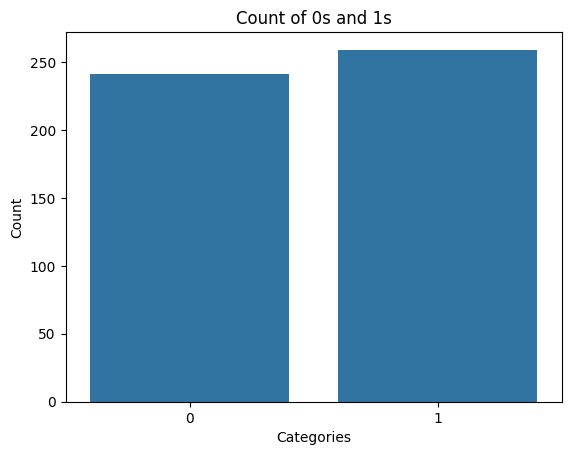

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


sns.countplot(x=y_train)

# Labeling the plot
plt.title('Count of 0s and 1s')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'])  # Ensuring labels are 0 and 1
plt.show()

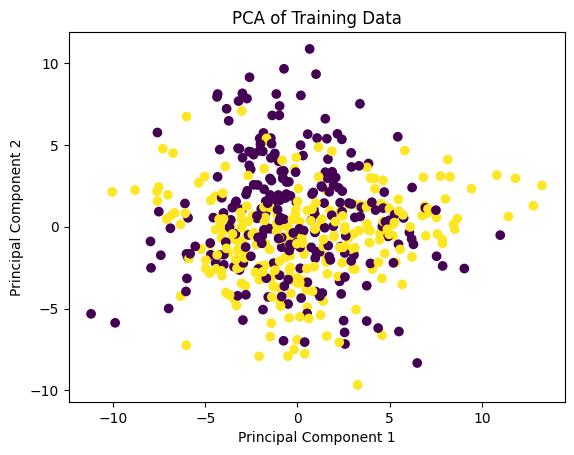

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Data')
plt.show()

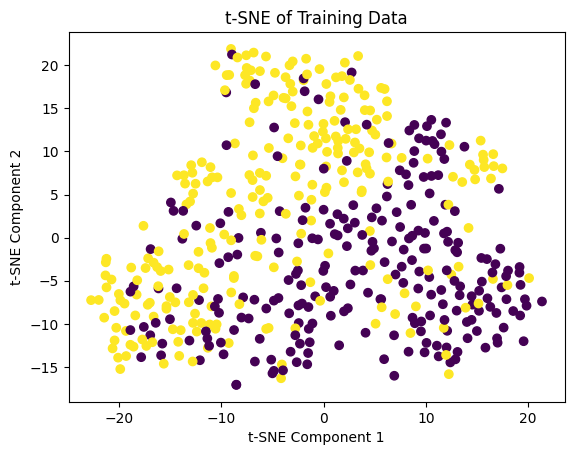

In [76]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Training Data')
plt.show()

In [64]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.24031395 0.16935623]


In [87]:
# SVC
from sklearn.svm import SVC

def objective(trial):
    param = {
        "C": trial.suggest_loguniform("C", 1e-3, 1e3),
        "degree": trial.suggest_int("degree", 2, 6),
        "coef0": trial.suggest_uniform("coef0", 0, 10),
        "kernel": "poly"
    }

    model = SVC(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-06-20 15:18:56,587] A new study created in memory with name: no-name-4c1df8b9-aa6f-4a6a-bffe-a91f413fd34f
/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T/ipykernel_15145/1436672630.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T/ipykernel_15145/1436672630.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "coef0": trial.suggest_uniform("coef0", 0, 10),
[I 2024-06-20 15:18:56,616] Trial 0 finished with value: 0.782 and parameters: {'C': 347.70334314411247, 'degree': 5, 'coef0': 3.4731575493352396}. Best is trial 0 with value: 0.782.
/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T

In [88]:
best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best accuracy:", best_score)

Best parameters: {'C': 83.38264312994671, 'degree': 5, 'coef0': 0.04258507245611831}
Best accuracy: 0.876


In [83]:
from sklearn.neighbors import KNeighborsClassifier

def objective(trial):
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 20),
        'p': trial.suggest_int('p', 1, 2),
    }
    model = KNeighborsClassifier(**param)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

[I 2024-06-20 15:10:59,613] A new study created in memory with name: no-name-b702e48a-8d80-4e54-bc1d-7bcfe4bb9848
[I 2024-06-20 15:10:59,620] Trial 0 finished with value: 0.802 and parameters: {'n_neighbors': 5, 'p': 2}. Best is trial 0 with value: 0.802.
[I 2024-06-20 15:10:59,630] Trial 1 finished with value: 0.804 and parameters: {'n_neighbors': 10, 'p': 1}. Best is trial 1 with value: 0.804.
[I 2024-06-20 15:10:59,637] Trial 2 finished with value: 0.804 and parameters: {'n_neighbors': 10, 'p': 1}. Best is trial 1 with value: 0.804.
[I 2024-06-20 15:10:59,643] Trial 3 finished with value: 0.802 and parameters: {'n_neighbors': 16, 'p': 2}. Best is trial 1 with value: 0.804.
[I 2024-06-20 15:10:59,700] Trial 4 finished with value: 0.806 and parameters: {'n_neighbors': 13, 'p': 1}. Best is trial 4 with value: 0.806.
[I 2024-06-20 15:10:59,711] Trial 5 finished with value: 0.814 and parameters: {'n_neighbors': 15, 'p': 1}. Best is trial 5 with value: 0.814.
[I 2024-06-20 15:10:59,718] T

In [84]:
best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'n_neighbors': 7, 'p': 2}
Best score: 0.826
